## Data Importing

In [1]:
#Import the relevant librairies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import the list of the sheet keys that are located on Climate Dominio data folder
'''
Here the list of the keys of each country temperature folder is imported.
Knowing the key will help import the data itself from the Gsheet.
'''

from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

gsheet_key = "1rFoF0IQ-2wqLKnY_9QtjVkr3Mjeu74RkWLtj6TN0TSc"
sheet_name = "List of all files ID"


workbook = gc.open_by_key(gsheet_key)
worksheet = workbook.worksheet(sheet_name)

column_values = worksheet.col_values(2)


column_values = [value for value in column_values if value]

print(column_values)

['File ID', '1-KUNEmWikkX4ll90Oag4NQifLuIfSZrCLqht0rtrQNw', '14Ih41fQ_QsxtFwFsWPHapDFEsGeK_WChrQEucoot3bs', '1gZVoosXfW256i_VL2inY8EW0GgzYULCq9BDPT9w1YE8', '1hGhwwV0Cb6XZ-1xHat33GdL8FJQF-DYuliEvT2GKB4Y', '1Dz373xqpBAf2Isu3CSCY5M2ETrkSdqNg9d45joRtQ7M', '1Xe4tNVJCFTwtehNAgNaN3O3Ui1dfSK-TQE1Ry0KCzjs', '1uKHigUPuWmZ873lo9TwQH7jEzjzlPu7M3yAk3XnnVi4', '12G7vYenQ6A-REqi7XbhO8YBHvuZ-ULzJlj8FQrgaZHI', '1UhpYcQwMcxtpvuazZtjxo9DK3BcCt4A8MYBdhcrsHIM', '18eJvKExVlNHVUVNEVxGjKnBAwCAphClSR8qWOKXNVg4', '1WMks2Kzg4Fdp6JbdWOyMJUXs40vcqgrvnLJreYar8j0', '1w5nIzh4-k3aj79qagjqyaUDO6EcFTse7PwI6gVitHUM', '1VMBKiZdKcaHuQqWt8rm5STql_kEQ8k0jjkpE54HB4X8', '1kg7XbS6oFtxVTrE4cOjAyijJjxdyG0fhZaH-yQ04t1k', '1W7yAKsoc8oHlHPv5GMgE6lUHhybUg1_ifM05mq7fSq8', '1KUiA6jBJT4hjtNGydvXSfyI3-IXRO9aZisk9HZyFBZo', '1XmLYRfTd-Bhs5ca0ZTwhEvDUKjalL-9xPiZc4KA627s', '1ctfambinuj-gCSgvkSvmYCMPp1bzK95uvMjLwAfcH4g', '1NM-S1CmchGSXsCGTvoVLk-esx64WSIjWt34gCTm8r_A', '1h8xdP7sU22npkOUkxGn3JQYkh74gzmCVA8ClD2FaI6E', '1y-0q2p73rbmCzy--5kT70VQrkw

In [4]:
#Import the list of the sheet names that are located on Climate Dominio data folder

'''
Here the list of the sheet names of each country temperature sheet is imported.
Knowing the name will help import the data itself from the Gsheet.
'''

gsheet_key = "1rFoF0IQ-2wqLKnY_9QtjVkr3Mjeu74RkWLtj6TN0TSc"
sheet_name = "Sheets"
# list_of_data = [
# ]

workbook = gc.open_by_key(gsheet_key)
worksheet = workbook.worksheet(sheet_name)

column_values_2 = worksheet.col_values(2)

column_values_2 = [value for value in column_values_2 if value]

print(column_values_2)

['Sheets', 'Transposed data, tas_timeseries_annual_cru_1901-2021_DZA', 'tas_timeseries_annual_cru_1901-2021_AGO', 'tas_timeseries_annual_cru_1901-2021_BEN', 'tas_timeseries_annual_cru_1901-2021_BWA', 'tas_timeseries_annual_cru_1901-2021_BFA', 'temperature', 'tas_timeseries_annual_cru_1901-2021_CMR', 'tas_timeseries_annual_cru_1901-2021_CPV', 'tas_timeseries_annual_cru_1901-2021_CAF', 'tas_timeseries_annual_cru_1901-2021_COM', 'tas_timeseries_annual_cru_1901-2021_COD', 'tas_timeseries_annual_cru_1901-2021_COG', 'tas_timeseries_annual_cru_1901-2021_CIV', 'tas_timeseries_annual_cru_1901-2021_DJI.', 'tas_timeseries_annual_cru_1901-2021_GNQ', 'tas_timeseries_annual_cru_1901-2021_ERI', 'tas_timeseries_annual_cru_1901-2021_ETH', 'tas_timeseries_annual_cru_1901-2021_SWZ', 'tas_timeseries_annual_cru_1901-2021_GAB', 'tas_timeseries_annual_cru_1901-2021_GMB', 'tas_timeseries_annual_cru_1901-2021_GHA', 'tas_timeseries_annual_cru_1901-2021_GIN', 'tas_timeseries_annual_cru_1901-2021_GNB', 'tas_times

### The following code blocks are data import but we split it into four parts because of colab API fails to import it once because of the the big size of the data.

In [5]:
#Import the data directly from the Gsheet

gsheet_key = column_values[1:11]
list_of_data_1 = []

for key in gsheet_key:
  workbook = gc.open_by_key(key)
  sheet = workbook.worksheet(workbook.worksheets()[0].title)

  # get_all_values gives a list of rows.
  rows = sheet.get_all_values()

  # Convert to a DataFrame and render.
  data = pd.DataFrame.from_records(rows[1:], columns=rows[1])
  data = data.drop(0, axis=0)
  data.rename(columns={"": "Year"}, inplace=True)
  data_melt = pd.melt(data, id_vars = ["Year"] , value_vars = data.columns, var_name='Area', value_name='Annual_temperature')
  data_melt['Country'] = [data.columns[1]]*data_melt.shape[0]
  list_of_data_1.append(data_melt)

In [6]:
# print the first split to see the output
list_of_data_1[1]

,Year,Area,Annual_temperature,Country
0,1901,Zimbabwe,21,Zimbabwe
1,1902,Zimbabwe,21.4,Zimbabwe
2,1903,Zimbabwe,21.58,Zimbabwe
3,1904,Zimbabwe,20.54,Zimbabwe
4,1905,Zimbabwe,21.4,Zimbabwe
...,...,...,...,...
1337,2018,Mashonaland East,20.83,Zimbabwe
1338,2019,Mashonaland East,21.04,Zimbabwe
1339,2020,Mashonaland East,20.76,Zimbabwe
1340,2021,Mashonaland East,20.72,Zimbabwe


In [8]:
gsheet_key = column_values[11:21]

list_of_data_2 = []


for key in gsheet_key:
  workbook = gc.open_by_key(key)
  sheet = workbook.worksheet(workbook.worksheets()[0].title)

  # get_all_values gives a list of rows.
  rows = sheet.get_all_values()

  # Convert to a DataFrame and render.
  data = pd.DataFrame.from_records(rows[1:], columns=rows[1])
  data = data.drop(0, axis=0)
  data.rename(columns={"": "Year"}, inplace=True)
  data_melt = pd.melt(data, id_vars = ["Year"] , value_vars = data.columns, var_name='Area', value_name='Annual_temperature')
  data_melt['Country'] = [data.columns[1]]*data_melt.shape[0]
  list_of_data_2.append(data_melt)


In [9]:
len(column_values)

56

In [10]:
# print the second split to see the output

list_of_data_2[0]

,Year,Area,Annual_temperature,Country
0,1901,South Africa,16.87,South Africa
1,1902,South Africa,16.74,South Africa
2,1903,South Africa,16.63,South Africa
3,1904,South Africa,16.68,South Africa
4,1905,South Africa,16.81,South Africa
...,...,...,...,...
1215,2018,Northern Cape,19.04,South Africa
1216,2019,Northern Cape,19.71,South Africa
1217,2020,Northern Cape,18.95,South Africa
1218,2021,Northern Cape,18.47,South Africa


In [13]:
# list_file_ID = column_values[1:]

gsheet_key = column_values[21:31]
# sheet_name = column_values_2[2:]
list_of_data_3 = []

sheet_index = 1

for key in gsheet_key:
  workbook = gc.open_by_key(key)
  sheet = workbook.worksheet(workbook.worksheets()[0].title)

  # get_all_values gives a list of rows.
  rows = sheet.get_all_values()

  # Convert to a DataFrame and render.
  data = pd.DataFrame.from_records(rows[1:], columns=rows[1])
  data = data.drop(0, axis=0)
  data.rename(columns={"": "Year"}, inplace=True)
  data_melt = pd.melt(data, id_vars = ["Year"] , value_vars = data.columns, var_name='Area', value_name='Annual_temperature')
  data_melt['Country'] = [data.columns[1]]*data_melt.shape[0]
  list_of_data_3.append(data_melt)

In [14]:
list_of_data_3[0]

,Year,Area,Annual_temperature,Country
0,1901,Mozambique,23.55,Mozambique
1,1902,Mozambique,23.87,Mozambique
2,1903,Mozambique,23.95,Mozambique
3,1904,Mozambique,23.31,Mozambique
4,1905,Mozambique,23.86,Mozambique
...,...,...,...,...
1459,2018,Inhambane,24.55,Mozambique
1460,2019,Inhambane,24.72,Mozambique
1461,2020,Inhambane,24.28,Mozambique
1462,2021,Inhambane,24.19,Mozambique


In [18]:
# list_file_ID = column_values[1:]

gsheet_key = column_values[31:56]
list_of_data_4 = []


for key in gsheet_key:
  workbook = gc.open_by_key(key)
  sheet = workbook.worksheet(workbook.worksheets()[0].title)

  # get_all_values gives a list of rows.
  rows = sheet.get_all_values()

  # Convert to a DataFrame and render.
  data = pd.DataFrame.from_records(rows[1:], columns=rows[1])
  data = data.drop(0, axis=0)
  data.rename(columns={'': "Year"}, inplace=True)
  data_melt = pd.melt(data, id_vars = ["Year"] , value_vars = data.columns, var_name='Area', value_name='Annual_temperature')
  data_melt['Country'] = [data.columns[1]]*data_melt.shape[0] # transform the data into long format
  list_of_data_4.append(data_melt)


In [19]:
list_of_data_4[0]

,Year,Area,Annual_temperature,Country
0,1901,Kenya,24.37,Kenya
1,1902,Kenya,24.55,Kenya
2,1903,Kenya,24.5,Kenya
3,1904,Kenya,23.87,Kenya
4,1905,Kenya,24.03,Kenya
...,...,...,...,...
5851,2018,Baringo,21.15,Kenya
5852,2019,Baringo,21.52,Kenya
5853,2020,Baringo,21.51,Kenya
5854,2021,Baringo,21.37,Kenya


In [20]:
All_data = []
for df in [list_of_data_1, list_of_data_2, list_of_data_3, list_of_data_4]:
  Merged_data = pd.concat(df)
  All_data.append(Merged_data)

In [21]:
Data = pd.concat(All_data)
Data

,Year,Area,Annual_temperature,Country
0,1901,Eswatini,19.33,Eswatini
1,1902,Eswatini,19.33,Eswatini
2,1903,Eswatini,19.43,Eswatini
3,1904,Eswatini,19.23,Eswatini
4,1905,Eswatini,19.35,Eswatini
...,...,...,...,...
3411,2018,Suhag,24.25,Arab Republic of Egypt
3412,2019,Suhag,23.62,Arab Republic of Egypt
3413,2020,Suhag,23.49,Arab Republic of Egypt
3414,2021,Suhag,24.06,Arab Republic of Egypt


In [22]:
Data.Country.unique()

array(['Eswatini', 'Zimbabwe', 'Arab Republic of Egypt', 'Zambia',
       'Uganda', 'Tunisia', 'Togo', 'Tanzania', 'Sudan', 'South Sudan',
       'South Africa', 'Somalia', 'Sierra Leone', 'Seychelles', 'Senegal',
       'São Tomé and Príncipe', 'Rwanda', 'Nigeria', 'Niger', 'Namibia',
       'Mozambique', 'Morocco', 'Mauritius', 'Mauritania', 'Mali',
       'Malawi', 'Madagascar', 'Libya', 'Liberia', 'Lesotho', 'Kenya',
       'Guinea-Bissau', 'Guinea', 'Ghana', 'The Gambia', 'Gabon',
       'Ethiopia', 'Eritrea', 'Equatorial Guinea', 'Djibouti', 'Congo',
       'Chad', 'Central African Republic', "Côte d'Ivoire",
       'Democratic Republic of Congo', 'Comoros', 'Cape Verde',
       'Cameroon', 'Burundi', 'Burkina Faso', 'Botswana', 'Benin',
       'Angola', 'Algeria'], dtype=object)

In [23]:
# Export the long range merged data
Data.to_excel("Merged_Temperature_data_version2022.xlsx")

=====================================================

## EDA
This part include the Exploratory Data Analysis.

=====================================================

In [24]:
Data = pd.read_excel("Merged_Temperature_data_version2022.xlsx")

In [25]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121390 entries, 0 to 121389
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          121390 non-null  int64  
 1   Year                121390 non-null  int64  
 2   Area                121390 non-null  object 
 3   Annual_temperature  121237 non-null  float64
 4   Country             121390 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 4.6+ MB


In [26]:
Data.drop('Unnamed: 0', axis=1, inplace=True)

In [27]:
Data

,Year,Area,Annual_temperature,Country
0,1901,Eswatini,19.33,Eswatini
1,1902,Eswatini,19.33,Eswatini
2,1903,Eswatini,19.43,Eswatini
3,1904,Eswatini,19.23,Eswatini
4,1905,Eswatini,19.35,Eswatini
...,...,...,...,...
121385,2018,Suhag,24.25,Arab Republic of Egypt
121386,2019,Suhag,23.62,Arab Republic of Egypt
121387,2020,Suhag,23.49,Arab Republic of Egypt
121388,2021,Suhag,24.06,Arab Republic of Egypt


In [28]:
Data[["Annual_temperature", "Year"]] = Data[["Annual_temperature", "Year"]].apply(pd.to_numeric)
# change the data types.

In [29]:
Data.Country.unique() # to check the unique countries

array(['Eswatini', 'Zimbabwe', 'Arab Republic of Egypt', 'Zambia',
       'Uganda', 'Tunisia', 'Togo', 'Tanzania', 'Sudan', 'South Sudan',
       'South Africa', 'Somalia', 'Sierra Leone', 'Seychelles', 'Senegal',
       'São Tomé and Príncipe', 'Rwanda', 'Nigeria', 'Niger', 'Namibia',
       'Mozambique', 'Morocco', 'Mauritius', 'Mauritania', 'Mali',
       'Malawi', 'Madagascar', 'Libya', 'Liberia', 'Lesotho', 'Kenya',
       'Guinea-Bissau', 'Guinea', 'Ghana', 'The Gambia', 'Gabon',
       'Ethiopia', 'Eritrea', 'Equatorial Guinea', 'Djibouti', 'Congo',
       'Chad', 'Central African Republic', "Côte d'Ivoire",
       'Democratic Republic of Congo', 'Comoros', 'Cape Verde',
       'Cameroon', 'Burundi', 'Burkina Faso', 'Botswana', 'Benin',
       'Angola', 'Algeria'], dtype=object)

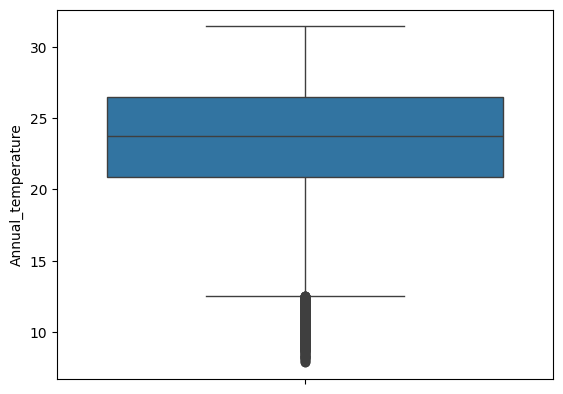

In [30]:
sns.boxplot(Data['Annual_temperature']) # see the data distribution and check for outliers
plt.show()

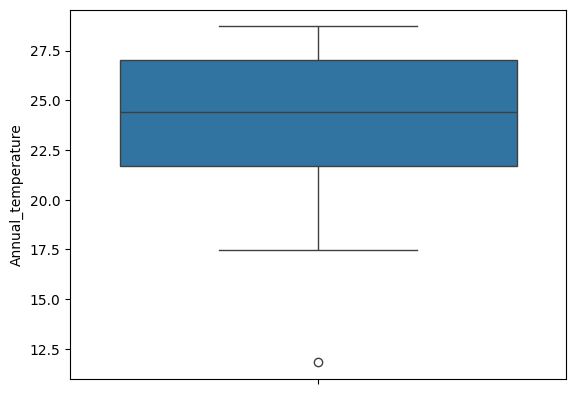

In [31]:
sns.boxplot(Data.groupby('Country')['Annual_temperature'].mean()) # check for the outliers for Annual temperature for countries
plt.show()

In [32]:
Data[Data["Annual_temperature"] == Data["Annual_temperature"].min()]
# check the country with the minimum temperature to see if it is a valid data.

,Year,Area,Annual_temperature,Country
70281,1910,Mokhotlong,7.87,Lesotho


In [33]:
# Check if there is duplicates
Data[Data.duplicated()].sum()

Year                                                            6700484
Area                  Arab Republic of EgyptArab Republic of EgyptAr...
Annual_temperature                                             73883.99
Country               Arab Republic of EgyptArab Republic of EgyptAr...
dtype: object

In [34]:
# # Check for mispelled values
Data.Country.unique()

array(['Eswatini', 'Zimbabwe', 'Arab Republic of Egypt', 'Zambia',
       'Uganda', 'Tunisia', 'Togo', 'Tanzania', 'Sudan', 'South Sudan',
       'South Africa', 'Somalia', 'Sierra Leone', 'Seychelles', 'Senegal',
       'São Tomé and Príncipe', 'Rwanda', 'Nigeria', 'Niger', 'Namibia',
       'Mozambique', 'Morocco', 'Mauritius', 'Mauritania', 'Mali',
       'Malawi', 'Madagascar', 'Libya', 'Liberia', 'Lesotho', 'Kenya',
       'Guinea-Bissau', 'Guinea', 'Ghana', 'The Gambia', 'Gabon',
       'Ethiopia', 'Eritrea', 'Equatorial Guinea', 'Djibouti', 'Congo',
       'Chad', 'Central African Republic', "Côte d'Ivoire",
       'Democratic Republic of Congo', 'Comoros', 'Cape Verde',
       'Cameroon', 'Burundi', 'Burkina Faso', 'Botswana', 'Benin',
       'Angola', 'Algeria'], dtype=object)

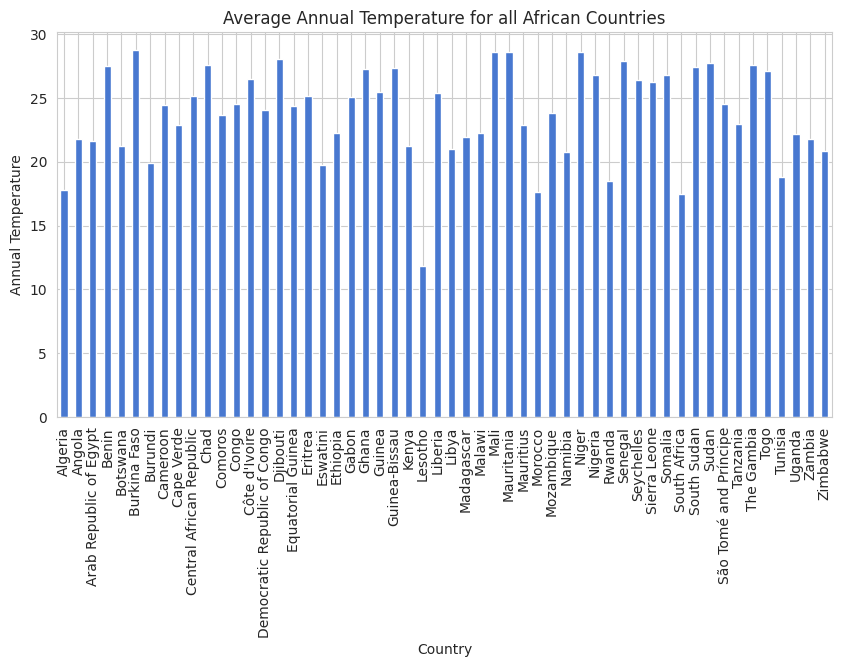

In [35]:
sns.set_style("whitegrid")
blue, = sns.color_palette("muted", 1)
ax = Data.groupby('Country')['Annual_temperature'].mean().plot(kind='bar', figsize=(10,5),rot=90,color= blue,
                                                          title="Average Annual Temperature for all African Countries")
ax.set_ylabel("Annual Temperature")
plt.show()

### Country level data
Here we split the data into 2 samples national level which is country data and subnational level which is country areas data.

In [36]:
list_country = []
for country in Data.Country.unique():
    country_data = Data[Data.Area == country]
    list_country.append(country_data)
country_data= pd.concat(list_country)

In [37]:
country_data.shape

(6954, 4)

### Subnational level

In [38]:
list_area = []
for country in Data.Country.unique():
    data = Data[Data.Country == country]
    area_data = data[data.Area != country]
    list_area.append(area_data)
subnational_data= pd.concat(list_area)

In [39]:
subnational_data.shape

(114558, 4)

In [40]:
country_data.groupby('Area')["Annual_temperature"].describe().T # Summary statistics

Area,Algeria,Angola,Arab Republic of Egypt,Benin,Botswana,Burkina Faso,Burundi,Cameroon,Cape Verde,Central African Republic,...,South Sudan,Sudan,São Tomé and Príncipe,Tanzania,The Gambia,Togo,Tunisia,Uganda,Zambia,Zimbabwe
count,122.000000,122.000000,244.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,...,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,23.103361,21.494836,22.553852,27.684098,21.479016,28.780000,19.977213,24.622295,22.904754,25.177787,...,27.243443,27.232623,24.261066,22.326639,27.853443,27.001557,19.684344,22.446803,21.733197,21.305164
std,0.414451,0.248384,0.601670,0.450978,0.516079,0.550001,0.450926,0.253233,0.297127,0.302716,...,0.603941,0.663230,0.268549,0.529312,0.456144,0.442020,0.702124,0.685845,0.422377,0.505646
min,22.400000,21.070000,21.120000,26.740000,20.460000,27.220000,18.890000,24.000000,22.150000,24.500000,...,26.280000,25.940000,23.580000,20.870000,26.940000,26.020000,18.580000,20.610000,20.920000,20.320000
25%,22.780000,21.302500,22.140000,27.355000,21.090000,28.450000,19.715000,24.460000,22.712500,24.972500,...,26.762500,26.752500,24.120000,22.032500,27.552500,26.720000,19.105000,22.102500,21.432500,20.937500
50%,23.005000,21.465000,22.545000,27.620000,21.455000,28.740000,19.995000,24.610000,22.880000,25.140000,...,27.130000,27.205000,24.205000,22.355000,27.785000,26.930000,19.525000,22.465000,21.690000,21.240000
75%,23.420000,21.662500,22.920000,28.047500,21.777500,29.150000,20.300000,24.805000,23.110000,25.347500,...,27.610000,27.747500,24.457500,22.725000,28.142500,27.345000,20.157500,22.862500,21.975000,21.617500
max,24.110000,22.220000,24.570000,28.950000,22.980000,30.130000,20.960000,25.220000,23.650000,26.000000,...,29.150000,29.140000,24.930000,23.290000,29.060000,28.170000,21.440000,24.030000,23.190000,22.790000


In [41]:
# replace the mispelling countries
country_data.Country.replace(["Congo (Democratic Republic of the)",
                              "Congo (Republic of the)", "Gambia, The","Tanzania, United Republic of"],
                              ["Democratic Republic of Congo", "Congo", "The Gambia", "Tanzania"], inplace=True)
country_data.Country.unique()

array(['Eswatini', 'Zimbabwe', 'Arab Republic of Egypt', 'Zambia',
       'Uganda', 'Tunisia', 'Togo', 'Tanzania', 'Sudan', 'South Sudan',
       'South Africa', 'Somalia', 'Sierra Leone', 'Seychelles', 'Senegal',
       'São Tomé and Príncipe', 'Rwanda', 'Nigeria', 'Niger', 'Namibia',
       'Mozambique', 'Morocco', 'Mauritius', 'Mauritania', 'Mali',
       'Malawi', 'Madagascar', 'Libya', 'Liberia', 'Lesotho', 'Kenya',
       'Guinea-Bissau', 'Guinea', 'Ghana', 'The Gambia', 'Gabon',
       'Ethiopia', 'Eritrea', 'Equatorial Guinea', 'Djibouti', 'Congo',
       'Chad', 'Central African Republic', "Côte d'Ivoire",
       'Democratic Republic of Congo', 'Comoros', 'Cape Verde',
       'Cameroon', 'Burundi', 'Burkina Faso', 'Botswana', 'Benin',
       'Angola', 'Algeria'], dtype=object)

### Compute the temperature variation over years

In [42]:
list_of_country_data = []
for country in country_data.Country.unique():
  subset_country = country_data[country_data.Country == country]
  subset_country['Temperature_variation_over_year'] = subset_country['Annual_temperature'].diff()
  list_of_country_data.append(subset_country)

In [43]:
country_level_data = pd.concat(list_of_country_data)
country_level_data.head()

,Year,Area,Annual_temperature,Country,Temperature_variation_over_year
0,1901,Eswatini,19.33,Eswatini,NaN
1,1902,Eswatini,19.33,Eswatini,0.00
2,1903,Eswatini,19.43,Eswatini,0.10
3,1904,Eswatini,19.23,Eswatini,-0.20
4,1905,Eswatini,19.35,Eswatini,0.12


In [44]:
year_2022_extraction = country_level_data[country_level_data.Year == 2022]
year_2022_extraction.to_excel('country_level_data_year_2022.xlsx')

In [45]:
country_level_data['Temperature_variation_over_year'].max() #check the the max variation to see if it is a reasonable value

1.620000000000001

In [46]:
country_level_data.to_excel('Country_level_Temperature_Data_variation.xlsx')

In [47]:
list_of_area_data = []
for c in subnational_data.Country.unique():
  sample = subnational_data[subnational_data.Country == c]
  for area in sample.Area.unique():
    subset_area = sample[sample.Area == area]
    subset_area['Temperature_variation_over_year'] = subset_area['Annual_temperature'].diff()
    list_of_area_data.append(subset_area)

In [48]:
subnational_level_data = pd.concat(list_of_area_data)
subnational_level_data.head()

,Year,Area,Annual_temperature,Country,Temperature_variation_over_year
122,1901,Hhohho,18.59,Eswatini,NaN
123,1902,Hhohho,18.61,Eswatini,0.02
124,1903,Hhohho,18.73,Eswatini,0.12
125,1904,Hhohho,18.47,Eswatini,-0.26
126,1905,Hhohho,18.64,Eswatini,0.17


In [49]:
subnational_level_data['Temperature_variation_over_year'].max()

1.8900000000000006

In [50]:
year_2022_extraction_subnational = subnational_level_data[subnational_level_data.Year == 2022]
year_2022_extraction_subnational.to_excel('subnational_level_data_year_2022.xlsx')

In [51]:
subnational_level_data.to_excel('subnational_level_data.xlsx')

In [52]:
subnational_data.to_excel('Subnational_data.xlsx')

In [53]:
!pip install dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 18.1 MB/s eta 0:00:00


In [55]:
import json
import plotly.express as px
from dash import Dash, Input, Output, dcc, html
geojson_file = "africa_adm0.geojson"
africa_countries = json.load(open(geojson_file, 'r'))

In [56]:
for i in range(53):
  print(africa_countries["features"][i]['properties']['name'])

Angola
Morocco
Mozambique
Sudan
S. Sudan
Somalia
Benin
Egypt
Eritrea
Ghana
Guinea-Bissau
Kenya
Niger
Liberia
Libya
Madagascar
Mali
Mauritania
Malawi
Namibia
Nigeria
Sierra Leone
Senegal
Uganda
Chad
South Africa
Tunisia
Tanzania
Zambia
Zimbabwe
Burkina Faso
Côte d'Ivoire
Congo
Cameroon
Dem. Rep. Congo
Guinea
Botswana
Central African Rep.
Comoros
Eq. Guinea
São Tomé and Principe
Burundi
Ethiopia
Gabon
Cape Verde
Swaziland
Djibouti
Togo
Algeria
Gambia
Lesotho
W. Sahara
Rwanda


In [57]:
to_be_replace = ["Central African Republic", "South Sudan","Cote d'Ivoire",'Democratic Republic of Congo',
                 'Sao Tome and Principe','Equatorial Guinea','Eswatini','The Gambia','Mauritius','Seychelles'
                  , 'Arab Republic of Egypt', 'São Tomé and Príncipe']
to_replace = ["Central African Rep.", "S. Sudan", "Côte d'Ivoire","Dem. Rep. Congo","São Tomé and Principe",
              "Eq. Guinea", "Swaziland","Gambia","W. Sahara", "W. Sahara",'Egypt',"São Tomé and Principe"  ]
country_data.Country.replace(to_be_replace, to_replace,  inplace=True)

In [58]:
africa_countries["features"][1]['properties']

{'name': 'Morocco',
 'adm0_a3': 'MAR',
 'cartodb_id': 2,
 'created_at': '2014-10-16T10:47:56Z',
 'updated_at': '2014-10-16T10:47:56Z'}

In [59]:
state_id_map = {}
for feature in africa_countries["features"]:
    feature["id"] = feature["properties"]["adm0_a3"]
    state_id_map[feature["properties"]["name"]] = feature["id"]

In [60]:
country_data["id"] = country_data["Country"].apply(lambda x: state_id_map[x])

In [61]:
pip install dash-bootstrap-components

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 kB 3.7 MB/s eta 0:00:00


In [62]:
import dash
import dash_bootstrap_components as dbc
import dash_core_components as dcc
import dash_html_components as html
import dash_table
import webbrowser
from threading import Timer


In [63]:
!pip install jupyter-dash -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.3 MB/s eta 0:00:00


In [64]:
from jupyter_dash import JupyterDash

In [65]:
minty = 'https://cdn.jsdelivr.net/npm/bootswatch@4.5.2/dist/minty/bootstrap.min.css'
app = dash.Dash(__name__, external_stylesheets=[minty])
app.title = 'Africa Glocal Climate'

# app = Dash(__name__)

# Define layout
app.layout = html.Div([
    html.H3(children='Glocal Africa Climate',style={'textAlign':'left','color':'Blue'
                                                                   }),
    dcc.Graph(id='graph'),
    html.Label('Select Filter'),
    dcc.Dropdown(
        id='filter-dropdown',
        options=[
            {'label': year, 'value':year} for year in country_data.Year.unique()
        ],

    )
])

@app.callback(
    Output('graph', 'figure'),
    [Input('filter-dropdown', 'value')]
)
def update_map(year):
  df = pd.DataFrame(country_data[country_data.Year == year])
  df.reset_index(inplace=True,drop=False)
  fig = px.choropleth(
      df,
      locations="id",
      # geojson = africa_countries,
      color = "Annual_temperature",
      hover_name = "Country",
      hover_data = ["Annual_temperature"],
      title= "Annual temperature per Country"
      )
  fig.update_geos(fitbounds="locations", visible=False)

  return fig

# def open_browser():
#     if not os.environ.get("WERKZEUG_RUN_MAIN"):
#         webbrowser.open_new('http://127.0.0.1:1222/')

# if __name__ == "__main__":
#     Timer(1, open_browser).start()
#     app.run_server(debug=True,port=8050)

if __name__ == '__main__':
  app.run_server()


<IPython.core.display.Javascript object>

In [ ]:
for c in subnational_data.Country.unique():
  print('{} {}'.format(c,subnational_data[subnational_data.Country== c]["Area"].unique()))

Let's see the temperature variation over the years in each area of each countries

In [ ]:
subnational_data.reset_index(inplace=True,drop=False)

In [ ]:
subnational_data.shape

(5656024, 5)

In [ ]:
subnational_data["Temperature_Variation"] = subnational_data["Annual_temperature"].diff()

In [ ]:
subnational_data

,index,Year,Area,Annual_temperature,Country,Temperature_Variation
0,121,1901,Adrar,25.83,Algeria,NaN
1,122,1902,Adrar,25.77,Algeria,-0.06
2,123,1903,Adrar,25.83,Algeria,0.06
3,124,1904,Adrar,25.89,Algeria,0.06
4,125,1905,Adrar,25.73,Algeria,-0.16
...,...,...,...,...,...,...
100304,106838,2017,Tandjile Ouest,27.27,Chad,-0.28
100305,106839,2018,Tandjile Ouest,27.17,Chad,-0.10
100306,106840,2019,Tandjile Ouest,27.30,Chad,0.13
100307,106841,2020,Tandjile Ouest,27.48,Chad,0.18


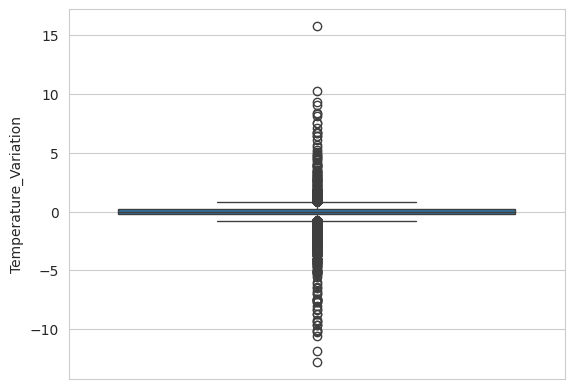

In [ ]:
sns.boxplot(['Annual_temperaturDatae'])

In [ ]:
import geopandas as gpd
import pandas as pd

# Charger le fichier shapefile des frontières des pays
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filtrer les pays pour inclure uniquement ceux situés en Afrique
africa = world[world['continent'] == 'Africa']

# Calculer les coordonnées du centre de chaque pays africain
africa['center'] = africa['geometry'].centroid
africa['lat'] = africa['center'].y
africa['lon'] = africa['center'].x

# Afficher les coordonnées du centre de chaque pays africain
df = pd.DataFrame(africa[['name', 'lat', 'lon']])
df

<ipython-input-3-4fbbc6e9c481>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
<ipython-input-3-4fbbc6e9c481>:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  africa['center'] = africa['geometry'].centroid
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/li

,name,lat,lon
1,Tanzania,-6.257732,34.752990
2,W. Sahara,24.291173,-12.137831
11,Dem. Rep. Congo,-2.850276,23.582956
12,Somalia,4.752348,45.726701
13,Kenya,0.595966,37.791555
14,Sudan,15.990585,29.862604
15,Chad,15.328867,18.581330
25,South Africa,-28.947033,25.048014
26,Lesotho,-29.625290,28.170105
48,Zimbabwe,-18.906988,29.788548


In [ ]:
import pandas as pd
egypt = pd.read_csv('Egypt.csv')
header = egypt.iloc[0]
egypt = egypt[1:]
egypt = egypt.rename(columns = header)


In [ ]:
egypt

,Year,Egypt,Alexandria,Assiut,Aswan,Behera,Beni Suef,Cairo,Dakahlia,Damietta,...,Menoufia,New Valley,North Sinai,Port Said,Qena,Red Sea,Shrkia,South Sinai,Suez,Suhag
1,1901,22.14,19.93,20.82,25.7,20.15,20.8,20.8,20.26,20.24,...,20.54,22.77,19.62,20.83,23.13,23.47,20.91,19.59,20.2,22.07
2,1902,21.76,19.45,20.32,25.29,19.65,20.28,20.26,19.79,19.77,...,20.03,22.45,19.15,20.32,22.67,23.08,20.42,19.11,19.68,21.6
3,1903,21.12,18.56,19.35,24.78,18.72,19.29,19.26,18.8,18.76,...,19.05,21.98,18.09,19.33,21.81,22.44,19.4,18.08,18.66,20.66
4,1904,21.32,19.04,19.94,24.77,19.23,19.89,19.88,19.38,19.37,...,19.61,22.01,18.72,19.95,22.24,22.58,20.01,18.7,19.32,21.21
5,1905,21.72,19.4,20.44,25.11,19.61,20.37,20.29,19.7,19.68,...,19.98,22.4,19.05,20.26,22.75,22.96,20.36,19.12,19.73,21.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2017,23.31,21.19,22.1,26.96,21.46,22.04,22.22,21.68,21.68,...,21.93,23.85,21.11,22.27,24.47,24.88,22.33,21.07,21.64,23.39
118,2018,24.08,22.22,22.99,27.28,22.43,23.01,23.1,22.47,22.43,...,22.82,24.62,21.82,23.02,25.24,25.23,23.14,21.82,22.46,24.25
119,2019,23.38,21.44,22.33,26.71,21.66,22.3,22.36,21.79,21.77,...,22.08,23.91,21.21,22.36,24.63,24.71,22.44,21.2,21.79,23.62
120,2020,23.18,21.31,22.21,26.44,21.55,22.22,22.27,21.74,21.74,...,21.97,23.62,21.17,22.33,24.48,24.51,22.39,21.17,21.72,23.49


In [ ]:
import numpy as np
egypt_melt = pd.melt(egypt, id_vars = ["Year"] , value_vars = egypt.columns, var_name='Area', value_name='Annual_temperature')
egypt_melt['Country'] = [egypt.columns[1]]*egypt_melt.shape[0]

In [ ]:
egypt_melt

,Year,Area,Annual_temperature,Country
0,1901,Egypt,22.14,Egypt
1,1902,Egypt,21.76,Egypt
2,1903,Egypt,21.12,Egypt
3,1904,Egypt,21.32,Egypt
4,1905,Egypt,21.72,Egypt
...,...,...,...,...
3383,2017,Suhag,23.39,Egypt
3384,2018,Suhag,24.25,Egypt
3385,2019,Suhag,23.62,Egypt
3386,2020,Suhag,23.49,Egypt


In [ ]:
egypt_melt[["Annual_temperature", "Year"]] = egypt_melt[["Annual_temperature", "Year"]].apply(pd.to_numeric)
# change the data types.

In [ ]:
egypt_melt

,Year,Area,Annual_temperature,Country
0,1901,Egypt,22.14,Egypt
1,1902,Egypt,21.76,Egypt
2,1903,Egypt,21.12,Egypt
3,1904,Egypt,21.32,Egypt
4,1905,Egypt,21.72,Egypt
...,...,...,...,...
3383,2017,Suhag,23.39,Egypt
3384,2018,Suhag,24.25,Egypt
3385,2019,Suhag,23.62,Egypt
3386,2020,Suhag,23.49,Egypt


In [ ]:
egypt_melt_country_level = egypt_melt[egypt_melt.Area == 'Egypt']
egypt_melt_country_level['Temperature_Variation'] = egypt_melt_country_level['Annual_temperature'].diff()

<ipython-input-10-126a9b2357fe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  egypt_melt_country_level['Temperature_Variation'] = egypt_melt_country_level['Annual_temperature'].diff()


In [ ]:
egypt_melt_country_level.to_excel("Egypt.xlsx")

In [ ]:
egypt_melt_subnational_level = egypt_melt[egypt_melt.Area != 'Egypt']

In [ ]:
egypt_melt_subnational_level['Temperature_Variation'] = egypt_melt_subnational_level['Annual_temperature'].diff()
egypt_melt_subnational_level

<ipython-input-13-914f73a75743>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  egypt_melt_subnational_level['Temperature_Variation'] = egypt_melt_subnational_level['Annual_temperature'].diff()


,Year,Area,Annual_temperature,Country,Temperature_Variation
121,1901,Alexandria,19.93,Egypt,NaN
122,1902,Alexandria,19.45,Egypt,-0.48
123,1903,Alexandria,18.56,Egypt,-0.89
124,1904,Alexandria,19.04,Egypt,0.48
125,1905,Alexandria,19.40,Egypt,0.36
...,...,...,...,...,...
3383,2017,Suhag,23.39,Egypt,-0.48
3384,2018,Suhag,24.25,Egypt,0.86
3385,2019,Suhag,23.62,Egypt,-0.63
3386,2020,Suhag,23.49,Egypt,-0.13


In [ ]:
list_of_egypt_area = []
for area in egypt_melt.Area.unique():
  subset_area = egypt_melt[egypt_melt.Area == area]
  subset_area['Temperature_variation_over_year'] = subset_area['Annual_temperature'].diff()
  list_of_egypt_area.append(subset_area)

<ipython-input-19-e57618db469c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_area['Temperature_variation_over_year'] = subset_area['Annual_temperature'].diff()
<ipython-input-19-e57618db469c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_area['Temperature_variation_over_year'] = subset_area['Annual_temperature'].diff()
<ipython-input-19-e57618db469c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [ ]:
list_of_egypt_area = pd.concat(list_of_egypt_area)

In [ ]:
list_of_egypt_area

,Year,Area,Annual_temperature,Country,Temperature_variation_over_year
0,1901,Egypt,22.14,Egypt,NaN
1,1902,Egypt,21.76,Egypt,-0.38
2,1903,Egypt,21.12,Egypt,-0.64
3,1904,Egypt,21.32,Egypt,0.20
4,1905,Egypt,21.72,Egypt,0.40
...,...,...,...,...,...
3383,2017,Suhag,23.39,Egypt,-0.48
3384,2018,Suhag,24.25,Egypt,0.86
3385,2019,Suhag,23.62,Egypt,-0.63
3386,2020,Suhag,23.49,Egypt,-0.13


In [ ]:
list_of_egypt_area.to_excel('Subnational_level_egypt.xlsx')